In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Seting Seaborn  for  visualizations
sns.set(style="whitegrid")

In [5]:
# Loading dataset
df = pd.read_csv('train.csv')

In [6]:
# verifying csv  loading
print("First 5 Rows of the Dataset:")
df.head()

First 5 Rows of the Dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Dataset and data types
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
# Summary statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
# Value counts for categorical columns
print("\nValue Counts for Categorical Columns:")
print("Survived (0 = No, 1 = Yes):\n", df['Survived'].value_counts(normalize=True))
print("Pclass (1 = 1st, 2 = 2nd, 3 = 3rd):\n", df['Pclass'].value_counts(normalize=True))
print("Sex:\n", df['Sex'].value_counts(normalize=True))
print("Embarked (C = Cherbourg, Q = Queenstown, S = Southampton):\n", df['Embarked'].value_counts(normalize=True))


Value Counts for Categorical Columns:
Survived (0 = No, 1 = Yes):
 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Pclass (1 = 1st, 2 = 2nd, 3 = 3rd):
 Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64
Sex:
 Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64
Embarked (C = Cherbourg, Q = Queenstown, S = Southampton):
 Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64


In [10]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
# Handling with missing values
# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())
# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Drop Cabin due to high missingness
df = df.drop(columns=['Cabin'])

# Verify missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Text(0, 0.5, 'Count')

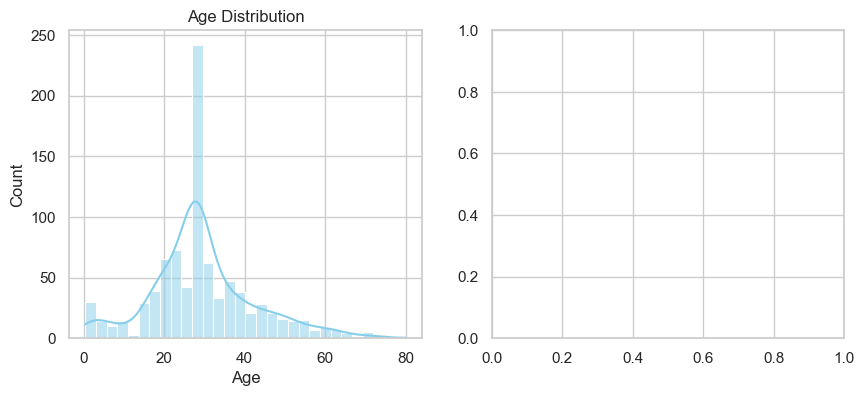

In [17]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Histogram for Age
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue', ax=ax1)
ax1.set_title('Age Distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

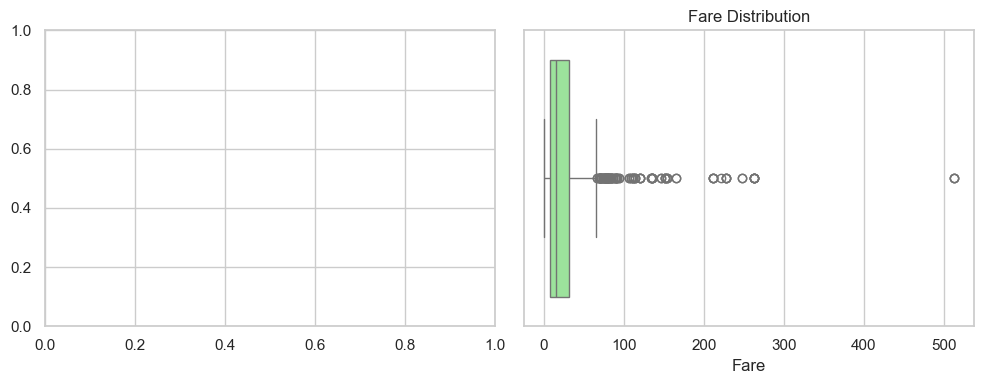

In [23]:
# Boxplot for Fare
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(x=df['Fare'], color='lightgreen', ax=ax2)
ax2.set_title('Fare Distribution')
ax2.set_xlabel('Fare')

plt.tight_layout()
plt.show()

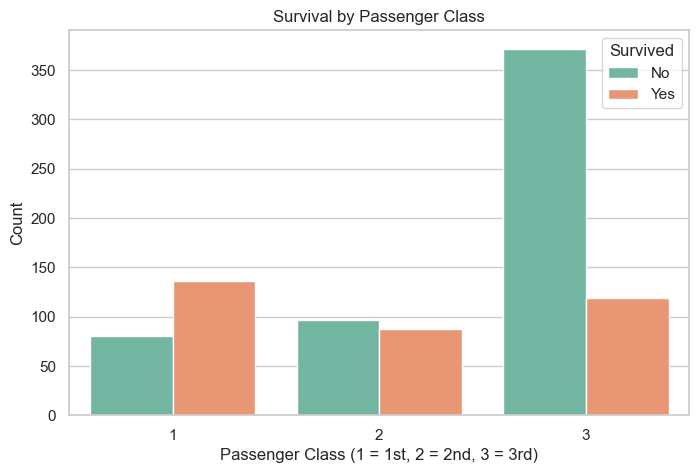

Observation: First-class passengers had the highest survival rate (62.9%).


In [25]:
# Survival by Pclass
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
print("Observation: First-class passengers had the highest survival rate (62.9%).")

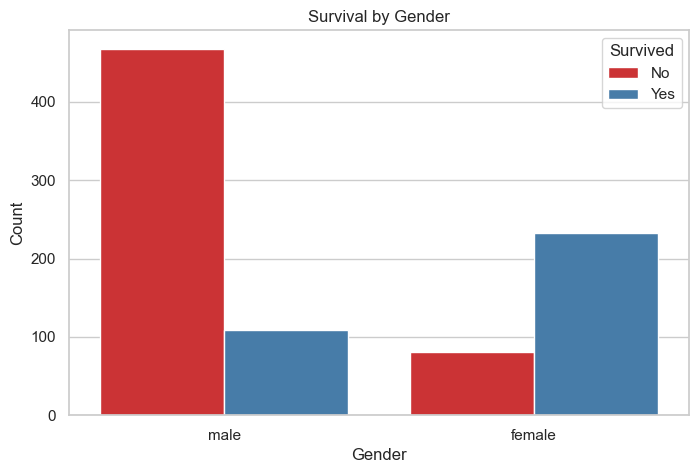

Observation: Females had a significantly higher survival rate (74.2%) compared to males (18.9%).


In [27]:
# Survival by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
print("Observation: Females had a significantly higher survival rate (74.2%) compared to males (18.9%).")

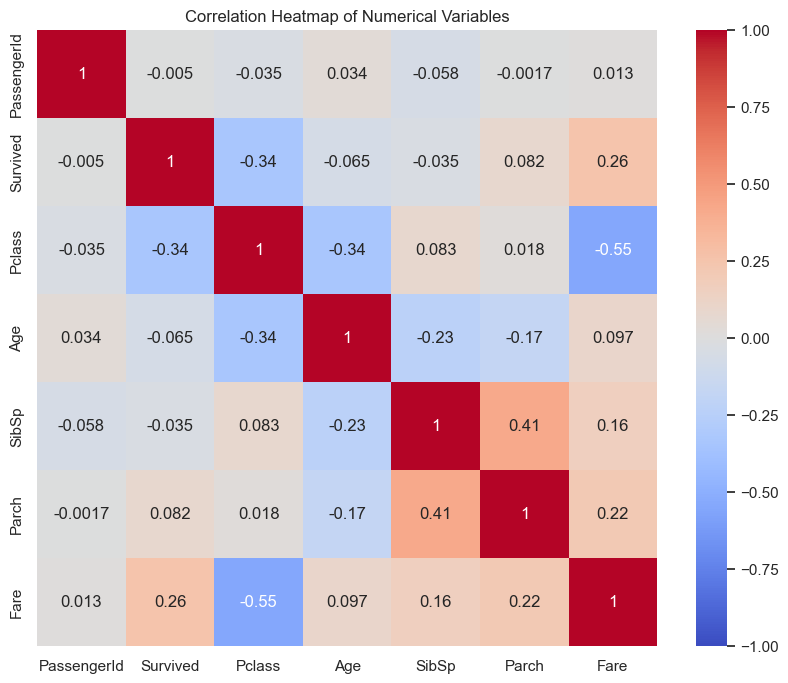

Heatmap shows moderate negative Pclass-Fare correlation (-0.55). Survived has weak correlations, strongest with Pclass (-0.34). No multicollinearity evident..


In [31]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select numerical columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()
print("Heatmap shows moderate negative Pclass-Fare correlation (-0.55). Survived has weak correlations, strongest with Pclass (-0.34). No multicollinearity evident..")

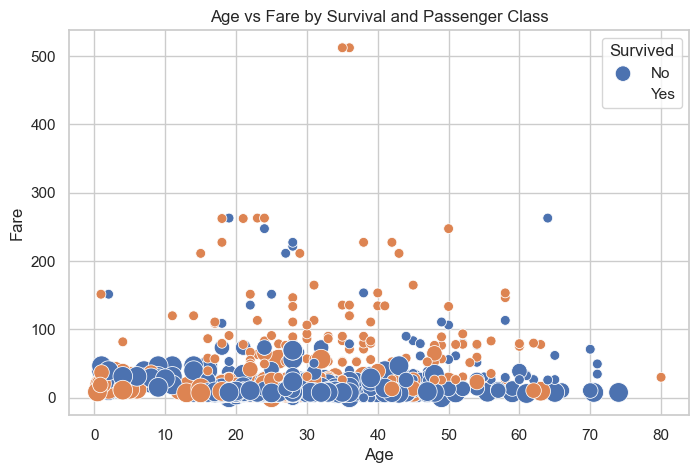

Observation: Higher fares are associated with first-class passengers (smaller Pclass values) and higher survival rates. 


In [34]:
# Scatterplot of Age vs Fare by Survival and Pclass
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', size='Pclass', sizes=(50, 200), data=df, palette='deep')
plt.title('Age vs Fare by Survival and Passenger Class')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
print("Observation: Higher fares are associated with first-class passengers (smaller Pclass values) and higher survival rates. ")

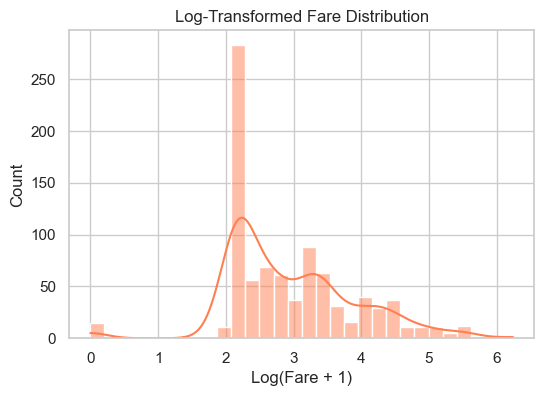

Observation: The log-transformed fare distribution is more symmetric than the original, reducing the impact of extreme outliers.


In [36]:
# Log transformation for Fare (add 1 to avoid log(0))
df['LogFare'] = np.log1p(df['Fare'])

# Histogram for LogFare
plt.figure(figsize=(6, 4))
sns.histplot(df['LogFare'], bins=30, kde=True, color='coral')
plt.title('Log-Transformed Fare Distribution')
plt.xlabel('Log(Fare + 1)')
plt.ylabel('Count')
plt.show()
print("Observation: The log-transformed fare distribution is more symmetric than the original, reducing the impact of extreme outliers.")

In [37]:
# Summary of Findings
print("\nSummary of Findings:")
print("- Dataset: 891 passengers, 12 columns (PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked).")
print("- Missing Values: Age (177 missing, filled with median ~28), Embarked (2 missing, filled with mode 'S'), Cabin (687 missing, dropped).")
print("- Survival Rate: 38.4% (342/891 survived).")
print("- Pclass: 55% in 3rd class, 24% in 1st class, 21% in 2nd class. Survival rates: 62.9% (1st), 47.3% (2nd), 24.2% (3rd).")
print("- Sex: 65% male, 35% female. Survival rates: 74.2% (female), 18.9% (male).")
print("- Age: Slightly right-skewed, median ~28 years. No strong survival correlation.")
print("- Fare: Highly right-skewed, median $14.45, outliers >$500. Log transformation reduces skewness.")
print("- Correlations: Moderate negative correlation between Pclass and Fare (-0.55). Survived correlates weakly with other variables.")
print("- Trends: First-class passengers and females had significantly higher survival rates, likely due to lifeboat priority.")
print("- Anomalies: High fare outliers indicate luxury tickets. High missingness in Cabin (77%) limits its use.")


Summary of Findings:
- Dataset: 891 passengers, 12 columns (PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked).
- Missing Values: Age (177 missing, filled with median ~28), Embarked (2 missing, filled with mode 'S'), Cabin (687 missing, dropped).
- Survival Rate: 38.4% (342/891 survived).
- Pclass: 55% in 3rd class, 24% in 1st class, 21% in 2nd class. Survival rates: 62.9% (1st), 47.3% (2nd), 24.2% (3rd).
- Sex: 65% male, 35% female. Survival rates: 74.2% (female), 18.9% (male).
- Age: Slightly right-skewed, median ~28 years. No strong survival correlation.
- Fare: Highly right-skewed, median $14.45, outliers >$500. Log transformation reduces skewness.
- Correlations: Moderate negative correlation between Pclass and Fare (-0.55). Survived correlates weakly with other variables.
- Trends: First-class passengers and females had significantly higher survival rates, likely due to lifeboat priority.
- Anomalies: High fare outliers indicate luxury ti